#  Ανακατέματα

---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

* Τα δεδομένα που θα χρησιμοποιήσουμε περιλαμβάνονται στο scikit-learn, οπότε μπορούμε να τα χρησιμοποιήσουμε άμεσα.

In [1]:
from sklearn import datasets

bc = datasets.load_breast_cancer(as_frame=True)
bc.data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


* Τα δεδομένα αφορούν στοιχεία από βιοψίες δειγμάτων εξετάσεων για καρκίνο του μαστού.

* Ο στόχος είναι να προβλέψουμε αν τα δεδομένα της βιοψίας δείχνουν την παρουσία καλοήθους (1) ή κακοήθους όγκου (0).

In [2]:
bc.target

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

* Θα πρέπει να διαχωρίσουμε τα δεδομένα μας σε αυτά που θα χρησιμοποιηθούν στην εκπαίδευση (training) και σε αυτά που θα χρησιμοποιήσουμε για έλεγχο (testing).

* Το scikit-learn έχει τη συνάρτηση `train_test_split()` η οποία μας διευκολύνει.

* Προσοχή: καθώς η `train_test_split()` διαχωρίζει τα δεδομένα με τυχαίο τρόπο, κάθε φορά θα παίρνουμε διαφορετικά δεδομένα για εκπαίδευση και για έλεγχο.

* Γενικότερα στο scikit-learn αν θέλουμε μια στοχαστική μέθοδος να δίνει πάντα τα ίδια αποτελέσματα, θα πρέπει να αρχικοποιούμε κατάλληλα τη γεννήτρια ψευδοτυχαίων αριθμών που χρησιμοποιεί, με την παράμετρο `random_state`.

* Αυτό κάνουμε εδώ καθώς το παρόν χρησιμοποιείται για εκπαιδευτικούς σκοπούς και δεν θέλουμε να αλλάζουν τα αποτελέσματα σε κάθε εκτέλεση. Στην παραγωγή φυσικά δεν χρειάζεται να το κάνουμε αυτό.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.25, 
                                                    random_state=1234)

print(X_train.shape, y_train.shape)

(426, 30) (426,)


* Θα ξεκινήσουμε με μία Μηχανή Διανυσμάτων Στήριξης.

In [4]:
from sklearn.svm import SVC

svm_clf = SVC()

* Κατά τα γνωστά καλούμε `fit()` στα δεδομένα εκπαίδευσης.

In [5]:
svm_clf.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


* Και στη συνέχεια `predict()` στα δεδομένα ελέγχου.

In [6]:
predicted = svm_clf.predict(X_test)

* Ας δούμε πώς τα πήγαμε.

In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88        55
           1       0.88      1.00      0.94        88

    accuracy                           0.92       143
   macro avg       0.94      0.89      0.91       143
weighted avg       0.93      0.92      0.91       143



* Ο ταξινομητής μας χρησιμοποιεί τον προεπιλεγμένο πυρήνα (`kernel='rbf'`), ο οποίος όπως είδαμε μπορεί να ξεχωρίσει μη γραμμικώς διαχωρίσιμα δεδομένα.

* Αλλά είναι σίγουρα η καλύτερη επιλογή ως υπερπαράμετρος;

* Μήπως τα δεδομένα είναι γραμμικώς διαχωρίσιμα;

In [8]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
predicted = svm_clf.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        55
           1       0.93      0.98      0.96        88

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143



* Ένα από τα πλεονεκτήματα του scikit-learn είναι ότι, όπως έχουμε πει, προσφέρει πολλές διαφορετικές μεθόδους Μηχανικής Μάθησης.

* Μια δημοφιλής μέθοδος Μηχανικής Μάθησης είναι η Στοχαστική Κάθοδος Κλίσης (Stochastic Gradient Descent).

* Η Στοχαστική Κάθοδος Κλίσης λειτουργεί με εντελώς διαφορετικό τρόπο από τις Μηχανές Διανυσμάτων Στήριξης.

* Εσωτερικά δημιουργεί μια γραμμική συνάρτηση, η οποία με βάση τα χαρακτηριστικά των δεδομένων μας υπολογίζει τον στόχο (κλάση) που θέλουμε.

* Στη διάρκεια της εκπαίδευσης, η συνάρτηση αυτή θα βγάζει (μάλλον) λάθος προβλέψεις.

* Εμείς θέλουμε να ελαχιστοποιήσουμε αυτό το λάθος, το οποίο ονομάζεται *απώλεια* (loss).

* Από τη μαθηματική ανάλυση ξέρουμε ότι για να ελαχιστοποιήσουμε μια συνάρτηση χρησιμοποιούμε παραγώγους.

* Η παράγωγος μιας συνάρτησης μας σε ένα σημείο μας δίνει την κλίση στο σημείο αυτό.

* Η Στοχαστική Κάθοδος Κλίσης προσπαθεί να προσαρμόσει τη συνάρτηση ώστε να κατέβει στη χαμηλότερη δυνατή απώλεια (λάθος) με βάση την κλίση σε κάθε σημείο (δεδομένο εκπαίδευσης).

* Ονομάζεται στοχαστική γιατί στη διαδικασία εκπαίδευσης παίρνουμε τυχαίες φουρνιές (batches) δειγμάτων από τα δεδομένα μας και υπολογίζουμε την απώλεια και τις διορθώσεις στη συνάρτηση με βάση τις παραγώγους.

* Να το δούμε στην πράξη.

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=1234)
sgd_clf.fit(X_train, y_train)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


* Προβλέπουμε και παίρνουμε πάλι την αναφορά ταξινόμησης.

In [10]:
predicted = sgd_clf.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86        55
           1       0.88      0.98      0.92        88

    accuracy                           0.90       143
   macro avg       0.92      0.88      0.89       143
weighted avg       0.91      0.90      0.90       143



* Τα αποτελέσματα είναι ενθαρρυντικά.

* Μπορούμε να δούμε αν μπορούμε να πάμε ακόμα καλύτερα.

* Ένας τρόπος είναι να δοκιμάσουμε άλλες υπερπαραμέτρους.

* Αλλά υπάρχει και κάτι άλλο, που μέχρι αυτή τη στιγμή το παραβλέψαμε.

* Για να δούμε τις επιμέρους κατανομές για κάθε ένα από τα χαρακτηριστικά (διαστάσεις) των δεδομένων μας.

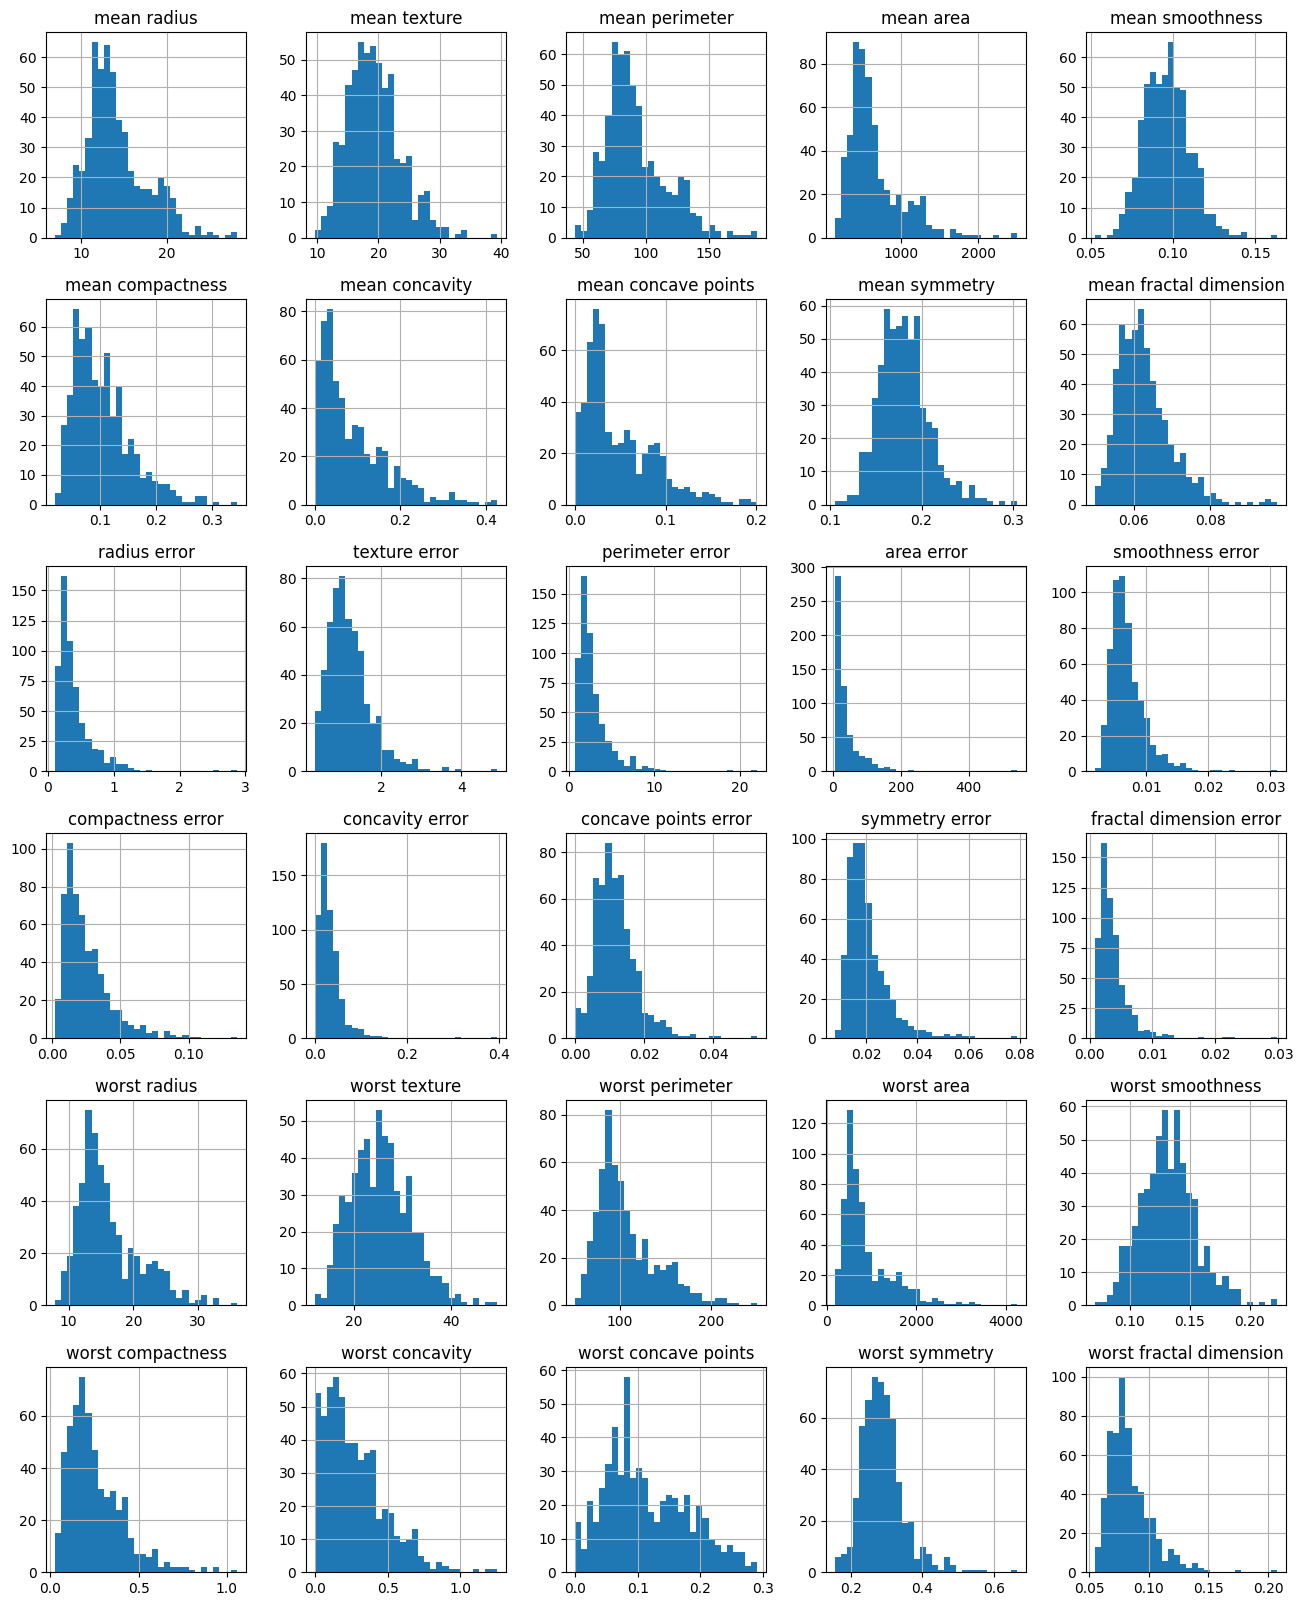

In [11]:
_ = bc.data.hist(figsize=(16, 20), bins=30)

* Παρατηρούμε ότι τα διαφορετικά χαρακτηριστικά (διαστάσεις) έχουν πολύ διαφορετικές κατανομές.

* Κάποιες μέθοδοι Μηχανικής Μάθησης δίνουν καλύτερα αποτελέσματα αν τα δεδομένα είναι *κανονικοποιημένα* (normalised).

* Υπάρχουν διάφοροι τρόποι να κανονικοποιηθούν τα δεδομένα μας:

  * Να μετατρέψουμε τα δεδομένα ώστε οι τιμές κάθε στήλης να κυμαίνονται στο διάστημα $[0, 1]$.
  * Nα μετατρέψουμε τα δεδομένα ώστε οι τιμές κάθε στήλης να κυμαίνονται στο διάστημα $[-1, 1]$.
  * Να μετατρέψουμε τα δεδομένα ώστε οι τιμές κάθε στήλης να έχουν μέσο όρο $0$ και διακύμανση $1$.
  
* Όλα αυτά (και άλλα) μπορεί να μας τα κάνει το scikit-learn.

* Η Στοχαστική Κάθοδος Κλίσης (αλλά και οι Μηχανές Διανυσμάτων Στήριξης) είναι από τις μεθόδους οι οποίες απαιτούν (συνήθως) κανονικοποίηση.

* Άρα θα κανονικοποιήσουμε τα δεδομένα μας ώστε να έχουν μέσο όρο $0$ και διακύμανση $1$, χρησιμοποιώντας έναν `StandardScaler`.

* Για να κάνουμε την κανονικοποίηση, εκπαιδεύουμε τον κανονικοποιητή μας *στα δεδομένα εκπαίδευσης*.

* Στην πράξη αυτό σημαίνει ότι ο `StandardScaler` θα μάθει, για κάθε στήλη, το μέσο όρο $\mu$ και τη διακύμανση $\sigma^2$.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


* Στη συνέχεια, μετατρέπουμε τα δεδομένα μας, τόσο εκπαίδευσης όσο και ελέγχου, καλώντας τη μέθοδο `transform()`.

* Στην πράξη ο `StandardScaler` εκτελεί για κάθε στοιχείο $x$ την πράξη:

  $$ x' = \frac{x-\mu}{\sigma^2} $$
  
  όπου $\mu$ ο μέσος όρος της στήλης και $\sigma^2$ η διακύμανση της στήλης.

In [13]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

* Εφαρμόζουμε τον ταξινομητή μας στα κανονικοποιημένα δεδομένα.

In [14]:
sgd_clf = SGDClassifier(random_state=1234)
sgd_clf.fit(X_train_scaled, y_train)
predicted = sgd_clf.predict(X_test_scaled)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        55
           1       0.96      0.99      0.97        88

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



* Με το `train_test_split()` μας απλοποιείται η διαδικασία της δημιουργίας δεδομένων εκπαίδευσης και ελέγχου.

* Υπάρχει όμως ένα θέμα.

* Αφού τα αποτελέσματα εκπαίδευσης και ελέγχου είναι αποτέλεσμα τυχαίας δειγματοληψίας, η αποτίμηση που έχουμε (π.χ. με το `classification_report()`) θα εξαρτάται από τη δειγματοληψία.

* Πράγματι, αν τρέξετε το παρόν σημειωματάριο επαναλαμβόμενες φορές χωρίς να ορίζετε `random_state` θα παίρνετε διαφορετικά αποτελέσματα.

* Για να έχουμε λοιπόν καλύτερη εκτίμηση της απόδοσης του ταξινομητή μας, μπορούμε να χρησιμοποιήσουμε μια άλλη προσέγγιση.

* Στην μέθοδο της *διασταυρωμένης επικύρωσης k-πτυχών* (k-fold cross validation), πραγματοποιούμε όχι έναν, αλλά $k$ ελέγχους.

* Σε κάθε μία από τις επικυρώσεις παίρνουμε μία διαφορετική πτυχή (ή φέτα) που περιέχει $1/k$ των δεδομένων μας, κρατάμε την πτυχή για έλεγχο, και τα υπόλοιπα τα χρησιμοποιούμε για εκπαίδευση.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b5/K-fold_cross_validation_EN.svg" />

Πηγή: https://en.wikipedia.org/wiki/Cross-validation_(statistics)

* Για να δούμε λοιπόν πώς μπορούμε να χρησιμοποιήσουμε την προσέγγιση με το scikit-learn.

In [15]:
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(random_state=1234)
scores = cross_val_score(sgd_clf, bc.data, bc.target, cv=5)
scores

array([0.87719298, 0.92982456, 0.90350877, 0.95614035, 0.91150442])

* Άρα αν θέλουμε να έχουμε μια καλύτερη άποψη για την απόδοση του ταξινομητή μας αυτή θα ήταν:

In [16]:
print(scores.mean(), scores.std())

0.9156342182890855 0.02639667733319382


* Πλην όμως είδαμε ότι μπορούμε να πάρουμε καλύτερα αποτελέσματα αν κανονικοποιήσουμε τα δεδομένα.

* Επομένως θέλουμε σε κάθε μία επικύρωση να δημιουργείται δεδομένα εκπαίδευσης και δεδομένα ελέγχου, να εκπαιδεύεται ο `StandardScaler` στα δεδομένα εκπαίδευσης *μόνο*, να εφαρμόζεται τόσο στα δεδομένα εκπαίδευσης όσο και στα δεδομένα ελέγχου, και να κάνουμε την εκπαίδευση του ταξινομητή και στη συνέχεια την αξιολόγησή του.

* Για να γίνονται όλα σωστά και με τη σειρά, μπορούμε να χρησιμοποιήσουμε τη δυνατότητα της *διασωλήνωσης* (ή διοχέτευσης, pipeline) που μας προσφέρει το scikit-learn.

In [17]:
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(), SGDClassifier(random_state=1234))
scores = cross_val_score(clf, bc.data, bc.target, cv=5)
scores

array([0.96491228, 0.98245614, 0.94736842, 0.96491228, 0.99115044])

* Άρα μετά την κανονικοποίηση, μπορούμε να αποφανθούμε σχετικά με την απόδοση του ταξινομητή μας:

In [18]:
print(scores.mean(), scores.std())

0.9701599130569786 0.01527302805266976


* Και τώρα, μπορείτε να ρωτήσετε, ποιον ταξινομητή θα χρησιμοποιήσουμε, από τους πέντε που κατασκευάστηκαν;

* Η απάντηση είναι, κανέναν από αυτούς.

* Τους πέντε ταξινομητές τους κατασκευάσαμε για να έχουμε μια εκτίμηση της απόδοσης της προσέγγισής μας.

* Αφού την αποκτήσαμε, μπορούμε να εκπαιδεύσουμε εκ νέου τον ταξινομητή μας με το σύνολο πλέον των δεδομένων που έχουμε στη διάθεσή μας.